In [1]:
import pandas as pd

df = pd.read_csv('/content/sample_data/iris (3).csv')
display(df.head())
print(df.shape)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(150, 5)


In [2]:
print(df.info())

print(df.describe())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop('species', axis=1)
y = df['species']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [5]:
from sklearn.metrics import accuracy_score

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Random Forest Classifier: {accuracy}")

Accuracy of the Random Forest Classifier: 1.0


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []
estimators = []

for n_estimator in range(10, 201, 10):
    rf_model = RandomForestClassifier(n_estimators=n_estimator, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    estimators.append(n_estimator)

optimal_n_estimators = estimators[accuracy_scores.index(max(accuracy_scores))]
print(f"Optimal number of estimators: {optimal_n_estimators}")
print(f"Accuracy with optimal estimators: {max(accuracy_scores)}")

Optimal number of estimators: 10
Accuracy with optimal estimators: 1.0


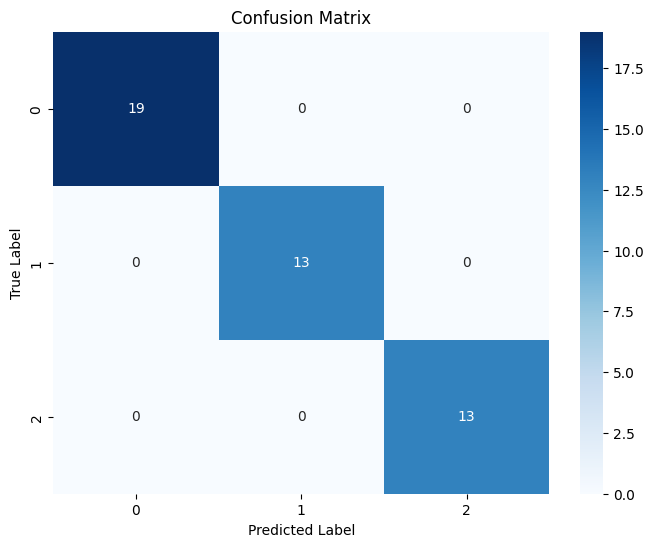

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_optimized = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()